<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" width= 150 style="padding-right:10px;" src="https://covers.oreillystatic.com/images/0636920052289/lrg.jpg">

*Essa aula é inteiramente baseada no **capítulo 8, Dimensionality Reduction** do livro [Hands-On Machine Learning with Scikit-Learn & TensorFlow](http://shop.oreilly.com/product/0636920052289.do) by Aurélien Geron; os notebooks do livro estão disponíveis [no GitHub](https://github.com/ageron/handson-ml).*

# Redução de Dimensionalidade

Em certas situações o treinamento de uma amostra pode ser extremamente longo e o grande número de características (features) da amostra pode tornar esse processo impraticável. 

Imagine que uma amostra tenha um certo número total de instâncias de treinamento:

> quanto maior o número de _features_ (dimensões), mais afastadas duas instâncias estarão uma da outra;

> quanto mais afastadas as instâncias, maior o risco de *over-fitting*;

Podemos visualizar no exemplo abaixo que à medida que aumentamos a dimensão de representação dos pontos, maior a distância entre eles (representada pela coloração dos pontos).

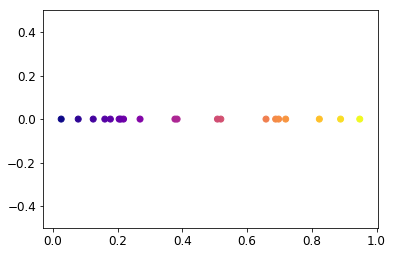

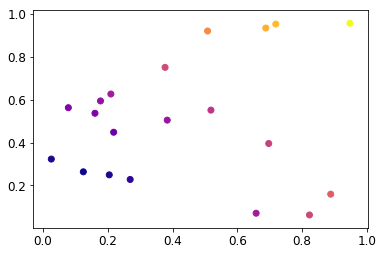

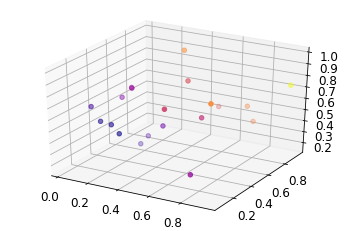

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import random

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

x = np.array([random.random() for i in range(20)])
y = np.array([random.random() for i in range(20)])
z = np.array([random.random() for i in range(20)])
y0 = [0 for i in range(20)]

plt.figure()
plt.scatter(x, y0, c=x, cmap='plasma')
plt.ylim(-.5, .5)

fig2 = plt.figure(3)
plt.scatter(x, y, c=np.sqrt(x*x + y*y), cmap='plasma')

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=np.sqrt(x*x + y*y + z*z), cmap='plasma')

plt.show()


Como uma forma de diminuir o tempo de treinamento e observar comportamentos da amostra (como por exemplo) *clustering*, se faz a **redução de dimensionalidade**.
Técnicas comuns de redução de dimensionalidade: **Projeção** e ***Manifold Learning***.

## Projeção

Na maioria dos casos, as instâncias de treinamento não se distribuem uniformemente ao longo das dimensões. Sendo assim, a maioria das instânicas se encontram em um ***subespaço*** com menos dimensões que o espaço de alta dimensão.

Por exemplo, se considerarmos as instâncias representadas no gráfico abaixo:
![projection_method](http://dfnae.fis.uerj.br/twiki/pub/DFNAE/ML4PPGF/projection.png)


Podemos projetar as instâncias no plano cinza escuro e com isso reduzir as dimensões para duas:


![projection_method](http://dfnae.fis.uerj.br/twiki/pub/DFNAE/ML4PPGF/projection2.png)


Porém a **projeção** nem sempre é a melhor abordagem.

Consideremos o exemplo de um conjunto de dados com a forma de um rocambole ou [***Swiss roll***](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html):


In [0]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
#print(X[0:4], t[0:4])

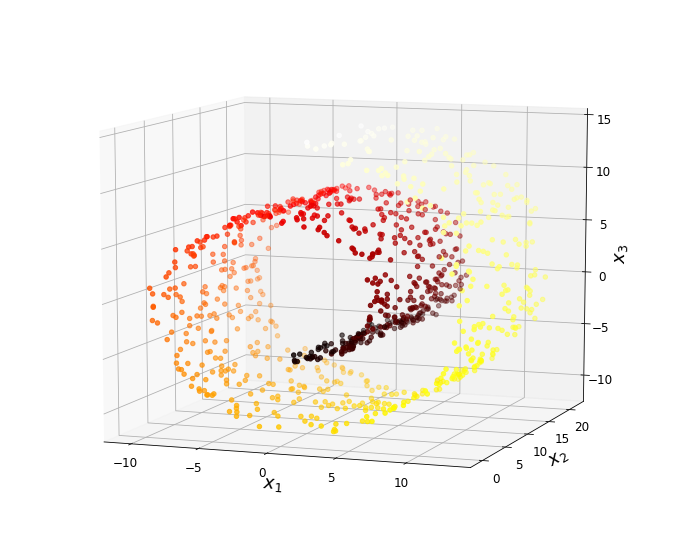

In [5]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("swiss_roll_plot")
plt.show()

Simplesmente projetar as instâncias em um plano, não resolve muito:

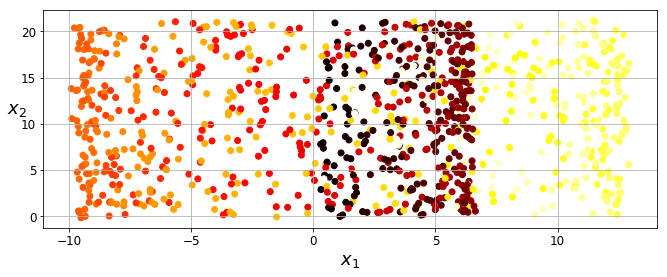

In [6]:
plt.figure(figsize=(11, 4))

#plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

#save_fig("squished_swiss_roll_plot")
plt.show()

O que queremos, é **desenrolar** o rocambole:

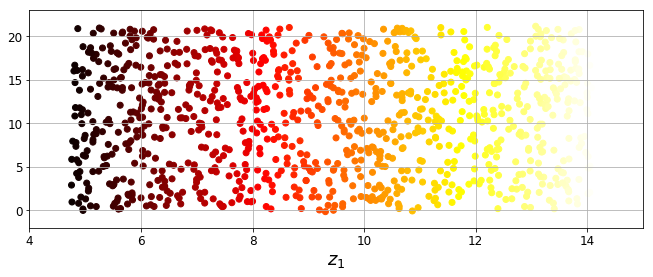

In [7]:
plt.figure(figsize=(11, 4))
#plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)


## Manifold Learning


O "rocambole" é um exemplo de ***variedade***.

***Variedade***: é um espaço topologógico que, localmente, pode ser considerado euclidiano.

Exemplos de varidades (*manifolds*): 
> **A Terra é redonda**. Porém, localmente, parece plana.

> O rocambole é cilídrinco, porém localmente pode ser considerado plano.

Em termos de topologia, o cilindro e o plano são topologicamente iguais, assim como um **círculo** e um **loop fechado** também.

Podemos usar essa ideia de **variedade** para tentar reduzir as dimensões de uma amostra, como fizemos com o "desenrolar" do rocambole.

O **Manifold Learning** se baseia no fato de que a tarefa a ser desenvolvida é simplificada ao diminuirmos o número de dimensões:

![manifold_learning](http://dfnae.fis.uerj.br/twiki/pub/DFNAE/ML4PPGF/swiss_roll.png)
![projection_method](http://dfnae.fis.uerj.br/twiki/pub/DFNAE/ML4PPGF/swiss_roll_unrolled.png)


###**Porém, nem sempre a redução dimensional simplifica o problema!!**

![manifold_learning](http://dfnae.fis.uerj.br/twiki/pub/DFNAE/ML4PPGF/swiss_roll_2.png)
![projection_method](http://dfnae.fis.uerj.br/twiki/pub/DFNAE/ML4PPGF/swiss_roll_unrolled_2.png)


> $\boxed{\textbf{The curse of dimensionality}}$

## Principal Component Algorithm (PCA)

É um algoritmo de redução de dimensionalidade muito popular.

O *Principal Component Algorithm* (PCA):

> identifica o hiperplano mais próximo dos dados;

> faz uma projeção dos dados nesse hiperplano.

Para escolher o hiperplano:

> procura-se por um eixo que **maximize a variância** ==> primeira componente principal, vetor unitário $c_1$;

> determina-se o segundo eixo como sendo perpendicular ao $c_1$, de variância máxima possível, vetor unitário $c_2$;

> o método PCA determina tantas componentes principais quanto o número de dimensões da amostra de dados.


![projection_method](http://dfnae.fis.uerj.br/twiki/pub/DFNAE/ML4PPGF/pca.png)

### Como obter as componentes principais de um conjunto de treinamento?

### =>  *Singular Value Decomposition* (SVD)

A *singular value decomposition* é uma técnica de ***fatorização*** da matriz de treinamento **X**:

\begin{equation*}
X = U \cdot \Sigma \cdot V
\end{equation*}

onde $V$ é a matriz que contém as componentes principais.

O *scikit-learn* tem ferramentas para PCA e o numpy tem um método para fazer SVD.


Vamos começar construindo um conjunto de dados 3D:


In [0]:
def produce_sample(m = 60, w1=0.1, w2=0.3, noise=0.1):
    np.random.seed(4)
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    X = np.empty((m, 3))
    X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
    #print("X = ", X)
    return X

Text(0.5, 0, 'X3')

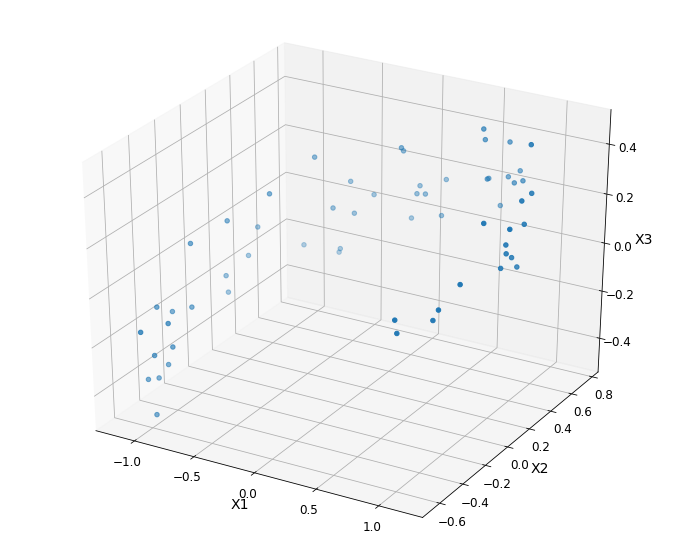

In [9]:
X = produce_sample()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")

O PCA assume que as distribuições estão centradas em zero:

c1 =  [0.93636116 0.29854881 0.18465208]
c2 =  [-0.34027485  0.90119108  0.2684542 ]


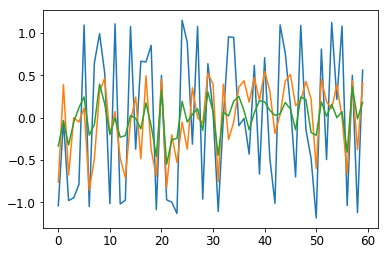

In [10]:
# centralizando a distribuição
X_centered = X - X.mean(axis=0)    
plt.figure(4)
plt.plot(X_centered)
# obtendo a decomposição da matriz de treinamento com o SVD do numpy
# o np.linalg.svd retorna as matrizes U, Sigma e a matriz transposta de V:
U, s, Vt = np.linalg.svd(X_centered) 
c1 = Vt.T[:, 0]                      # para obter as componentes principais, tomamos a transposta(Vt)                 
c2 = Vt.T[:, 1]
print("c1 = ", c1)
print("c2 = ", c2)

Agora que temos as componentes principais, podemos reduzir a dimensão do nosso conjunto de dados 3D para 2D, usando a matriz W2, com as duas primeiras componentes principais.

In [11]:
W2 = Vt.T[:, :2]
print("W2 = ", W2)

W2 =  [[ 0.93636116 -0.34027485]
 [ 0.29854881  0.90119108]
 [ 0.18465208  0.2684542 ]]


Text(0, 0.5, 'X2')

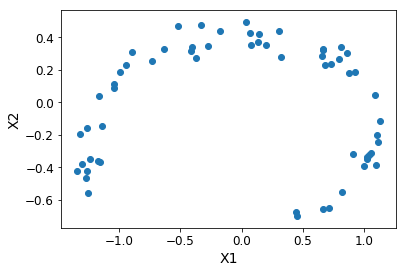

In [12]:
X2D = X_centered.dot(W2) # projetando a matriz X no plano definido pelas componentes principais.
plt.figure(5)
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")

## PCA usando o scikit-learn

A classe **pca** do *scikit-learn*, implementa o PCA usando a decomposição SVD.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)  # aqui você pode especificar o número de componentes principais
X2D = pca.fit_transform(X)   # aplica o PCA na amostra de treinamento, para 2 dimensões (n_components=2)

In [14]:
Vt = pca.components_
print(Vt)

[[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]]


In [15]:
components_ = pca.components_.T
print(components_)

[[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


In [16]:
c1 = components_[:, 0]
print(c1)

[-0.93636116 -0.29854881 -0.18465208]


### Explained Variance Ratio

Indica a proporção da variância dos dados no eixo de cada componente principal.

In [17]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

No exemplo acima, 84% da variância dos dados está contida no eixo da primeira componente principal e 14,6% no eixo a segunda componente principal.

Isso implica que há apenas 1,2% de variância para o terceiro eixo ==> razoável que tenhamos considerado os dados em 2D.

Lembrando que quanto maior a variância dos dados, maior a quantidade de informação contida neles.

### Escolhendo o número certo de dimensões

É aconselhável que escolhamos um número de dimensões que englobe uma porcentagem razoável da variância dos dados. Estabelecemos 95%.

Podemos calcular as PCAs sem reduzir as variáveis e depois calcular qual o número de componentes que abrange 95% da variância:

In [18]:
X = produce_sample()
pca = PCA()
pca.fit(X)
print("pca.explained_variance_ratio_ = ", pca.explained_variance_ratio_)

pca.explained_variance_ratio_ =  [0.84248607 0.14631839 0.01119554]


In [19]:
# calcular a soma cumulativa das variâncias para cada nova dimensão:
cumsum = np.cumsum(pca.explained_variance_ratio_) 
print("cumsum = ", cumsum)

cumsum =  [0.84248607 0.98880446 1.        ]


In [20]:
# encontrar o valor da dimensão (índice do vetor 'cumsum' + 1) que satisfaz os 95% de variância
d = np.argmax(cumsum >= 0.95) + 1
print("número de dimensões que engloba >=95% da variância = ", d)

número de dimensões que engloba >=95% da variância =  2


Uma vez determinado o número optimal de dimensões, podemos rodar o PCA novamente:

In [0]:
pca = PCA(n_components=d)
X2D = pca.fit_transform(X)

Outra forma equivalente de procurar pelo número optimal de dimensões, é especificando a porcentagem da variância mínima que queremos atingir, 95%

In [0]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

Podemos também olhar para o gráfico do acúmulo da variância em função do número de dimensões. Usaremos como exemplo o MNIST dataset:

In [0]:
from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [0]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

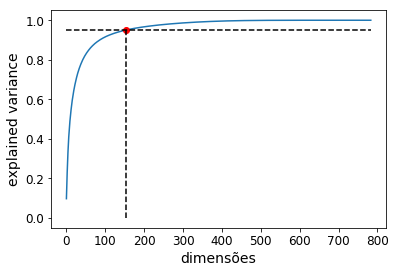

In [25]:
pca = PCA()
X_new = pca.fit(X_train) 
n_train_features = X_train.shape[1]
cumsum = np.cumsum(pca.explained_variance_ratio_)

## plotar o gráfico de explained_variance Vs. n_dimensões:
plt.plot(cumsum)
plt.xlabel("dimensões")
plt.ylabel("explained variance")
d_95 = np.argmax(cumsum > 0.95) + 1  # n_dimensoes com explained variance ratio >= 0.95
exp_var = 0.95
plt.plot(d_95, exp_var, "ro")
x = np.arange(0, n_train_features)
y = 0*x + 0.95
plt.plot(x, y, 'k--')
y = np.linspace(0, exp_var)
x = 0*y + d_95
plt.plot(x, y, 'k--')

## PCA para compressão

Podemos usar a redução de dimensionalidade para fazer compressão de imagens. 

Utilizando o conjunto de dados MNIST do exemplo anterior, cada instância de dados tem originalmente 784 *features*. Após a redução de dimensionalidade com PCA preservando 95% da variância dos dados, as intâncias ficam com 154 *features*.  

In [26]:
print("numero de features de cada instanica dos dados: ", n_train_features)
print("numero de features apos aplicacao do PCA com 95 de variancia: ", d_95)

numero de features de cada instanica dos dados:  784
numero de features apos aplicacao do PCA com 95 de variancia:  154


Visualização da imagem original:

In [0]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Original')

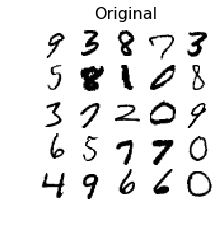

In [28]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
print(X_train[::2100])
plt.title("Original", fontsize=16)

Para visualizar a imagem com compressão, vamos rodar novamente o PCA, preservando 95% da variância.

In [0]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced) #para reconstrução a partir da imagem de dimensionalidade reduzida

In [0]:
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

Há uma pequena perda na qualidade das imagens (correspondentes aos 5% de variância perdida quando reduzimos a dimensionalidade), porém ainda é possível reconhecer a informação das imagens sem nenhuma dificuldade.

Podemos quantificar a perda de informação ao se fazer redução de dimensão:

> distância quadrática média entre os dados originais e os reconstruídos ==> *erro de reconstrução*

\begin{equation*}
MSD = \frac{1}{N}\sum_{i=1}^{N} (x_i(t) - x_i(0))^2
\end{equation*}

## Exercícios:

1) Faça o carregamento do conjunto de dados MNIST e divida-o em um conjunto de treinamento e outro de teste (60k instâncias para treinamento e o restante, 10k, para teste).
> treine um classificador Random Forest

> conte o tempo de treinamento

> avalie o modelo resultante na amostra de teste

2) Em seguida, use o PCA para reduzir a dimensionalidade dos dados, com uma *explained variance ratio* de 95%.
> Treine um classificador Random Forest no conjunto de dados de dimensionalidade reduzida 

> meça o tempo de processamento do treinamento. O quão mais rápido é, comparado ao treinamento sem redução de dimensionalidade?

> avalie o classificador na amostra de teste. Como ele se compara com o anterior?

In [0]:
from six.moves import urllib
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

1) Treine um classificador Random Forest nos dados e meça o tempo de execução para o treinamento:

In [0]:
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)


t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

print("O treinamento levou {:.2f}s".format(t1 - t0))

Avalie a performance do classificador:

In [0]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

em seguida, usa o PCA para reduzir a dimensionalidade, com 95% de *variance ratio*

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

Treine um novo classificador Random Forest e conte o tempo:

In [0]:
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("O treinamento levou {:.2f}s".format(t1 - t0))

O tempo aumentou! Como vimos anteriormente, nem sempre a projeção resulta em uma melhor separação.

E a performance, como fica?

In [0]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

Não é incomum que a performance diminua quando reduzimos a dimensionalidade.

Vamos tentar um outro classificador:

In [0]:
from sklearn.svm import SVC

log_clf = SVC(random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

In [0]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [0]:
log_clf = SVC(random_state=42)
t0 = time.time()
log_clf.fit(X_train_reduced, y_train)           #treinando o SVM com o dataset reduzido dimensionalmente com o PCA.
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

In [0]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

### Exercício:
1) Teste a redução de dimensionalidade para um outro modelo, como por exemplo o "Logistic Regression".

2) Fazer os grágicos de visualização dos dados MNIST acima, com e sem redução de dimensionalidade.